## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [96]:
# Checking the number of mice.

len(study_data_complete["Mouse ID"].unique())





249

In [97]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mouseCount = study_data_complete.groupby(["Mouse ID"]).count()["Timepoint"].rename("Counts of Mouse ID")

mouseCountDF = pd.DataFrame({"Counts of Mouse ID": mouseCount})

mouseCountDF = mouseCountDF.sort_values("Counts of Mouse ID", ascending=False)

mouseCountDF.head()

,Counts of Mouse ID
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10


In [98]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID

duplicateMiceData = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
# check the mouse data for ID

duplicateMiceData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleanStudy = study_data_complete[study_data_complete["Mouse ID"].isin(duplicateMiceData)==False]
cleanStudy.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [100]:
# Checking the number of mice in the clean DataFrame.
len(cleanStudy["Mouse ID"].unique())

249

## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = cleanStudy.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = cleanStudy.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances = cleanStudy.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sds = cleanStudy.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = cleanStudy.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summaryTable = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Stdev": sds,
    "Tumor Volume SEM": sems
})

summaryTable

# series variable to hold Tumor Volume Data grouped by Drug Regimen

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen


# variable to hold median Tumor Volume Data Grouped by Drug Regimen


# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen


# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen


# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen


# Convert to DataFrame

# Preview DataFrame

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = cleanStudy.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
    
    
})

summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [103]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens
cleanStudy.drop_duplicates(["Mouse ID"])


# drug regimen as x-axis values for plotting"



# drop all duplicate mice


# get mice counts per drug



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


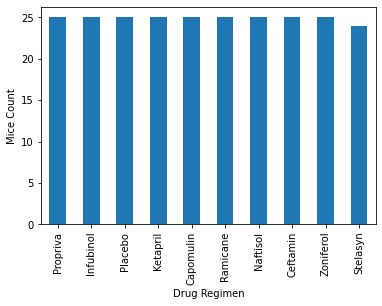

In [234]:
# plot the mouse counts for each drug using pandas

counts = cleanStudy.drop_duplicates(["Mouse ID"])["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.ylabel ("Mice Count")
plt.xlabel ("Drug Regimen")
plt.show()


This bar chart displays the total number of measurements taken on each drug regimen. The count for Stelasyn was slightly lower than the rest of the drugs.


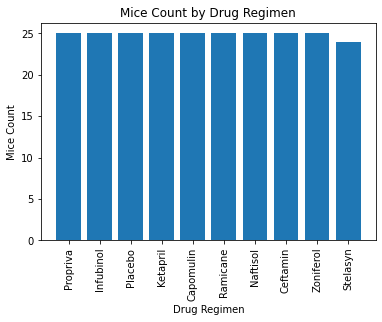

In [231]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen

plt.bar(counts.index.values, counts.values)
plt.ylabel ("Mice Count")
plt.xlabel ("Drug Regimen")
plt.title ("Mice Count by Drug Regimen")
plt.xticks(rotation=90)
plt.show
print(f"This bar chart displays the total number of measurements taken on each drug regimen. The count for Stelasyn was slightly lower than the rest of the drugs.")


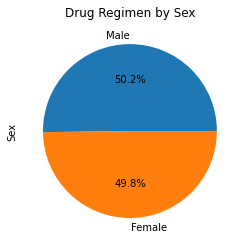

This pie chart shows the distribution of female vs male mice in our dataset. The percentage of male mice is slightly larger than female.


In [224]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

counts = cleanStudy.drop_duplicates(["Mouse ID"])["Sex"].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Drug Regimen by Sex")
plt.show()
print(f"This pie chart shows the distribution of female vs male mice in our dataset. The percentage of male mice is slightly larger than female.")

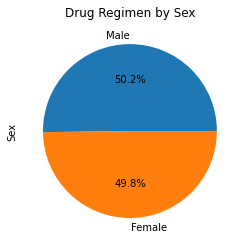

This pie chart shows the distribution of female vs male mice in our dataset. The percentage of male mice is slightly larger than female.


In [225]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Drug Regimen by Sex")
plt.show()
print(f"This pie chart shows the distribution of female vs male mice in our dataset. The percentage of male mice is slightly larger than female.")

## Quartiles, Outliers and Boxplots

In [184]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
lastTumorVolume = cleanStudy.groupby("Mouse ID")["Timepoint"].max()
lastTumorVolume = lastTumorVolume.reset_index()

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# show all rows of data
cleanMergedDF = lastTumorVolume.merge(cleanStudy, on=["Mouse ID", "Timepoint"], how="left")
cleanMergedDF = cleanMergedDF.sort_values("Timepoint", ascending=True)


cleanMergedDF2 = cleanMergedDF.set_index("Drug Regimen")
cleanMergedDF2 = cleanMergedDF2.drop(["Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"], axis=0)
cleanMergedDF2 = cleanMergedDF2.reset_index()
cleanMergedDF2 

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Ceftamin,t573,0,45.000000,0,Female,15,27
1,Ceftamin,u153,0,45.000000,0,Female,11,25
2,Ceftamin,b447,0,45.000000,0,Male,2,30
3,Ceftamin,x226,0,45.000000,0,Male,23,28
4,Infubinol,m756,5,47.010364,1,Male,19,30
5,Ceftamin,h531,5,47.784682,0,Male,5,27
6,Infubinol,v339,5,46.250112,0,Male,20,26
7,Infubinol,c326,5,36.321346,0,Female,18,25
8,Ramicane,w678,5,43.166373,0,Female,5,24
9,Infubinol,o813,5,45.699331,0,Male,24,28


In [158]:
print(cleanMergedDF2["Drug Regimen"].unique())

['Ceftamin' 'Infubinol' 'Ramicane' 'Capomulin']


In [195]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drugRegimenList = ['Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolumeList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drugRegimenList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
     finalTumorVolumes = cleanMergedDF2.loc[cleanMergedDF2["Drug Regimen"]== d, "Tumor Volume (mm3)"]

    # add subset 
     tumorVolumeList.append(finalTumorVolumes)

 

In [219]:
# Determine outliers using upper and lower bounds
quartiles = finalTumorVolumes.quantile([0.372, 0.4, 0.6])
lowerq = quartiles[0.372]
upperq = quartiles[0.6]
iqr = upperq - lowerq
lowerbound = lowerq - (1.5 * iqr)
upperbound = upperq + (1.5 * iqr)
outliers = finalTumorVolumes.loc[(finalTumorVolumes < lowerbound) | (finalTumorVolumes > upperbound)]
print(f"{d}'s potential outliers: \n{outliers}\n")

Capomulin's potential outliers: 
14    46.539206
17    30.485985
43    31.023923
49    23.343598
55    28.484033
81    28.430964
88    47.685963
Name: Tumor Volume (mm3), dtype: float64



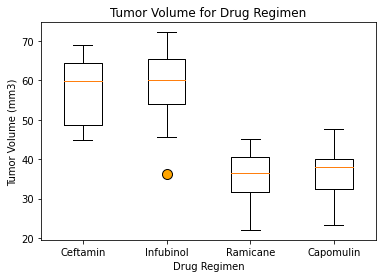

In this boxplot of tumor volume vs drug regimen, there appears to be an outlier in the Infubinol drug group, tumor volume=38(mm3)


In [222]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor="orange", markersize=10)
plt.boxplot(tumorVolumeList, labels=drugRegimenList, flierprops=orange_out)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Drug Regimen")
plt.show()
print(f"In this boxplot of tumor volume vs drug regimen, there appears to be an outlier in the Infubinol drug group, tumor volume=38(mm3)") 

## Line and Scatter Plots

In [198]:
#generate a table of all mice treated with Capomulin
capomulinTable= cleanMergedDF2.loc[cleanMergedDF2["Drug Regimen"]=="Capomulin"]
capomulinTable

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
10,Capomulin,w150,10,39.952347,0,Male,23,23
14,Capomulin,r157,15,46.539206,0,Male,22,25
17,Capomulin,f966,20,30.485985,0,Male,16,17
34,Capomulin,j246,35,38.753265,1,Female,21,21
40,Capomulin,r554,45,32.377357,3,Female,8,17
42,Capomulin,y793,45,31.896238,2,Male,17,17
43,Capomulin,u364,45,31.023923,3,Male,18,17
49,Capomulin,s185,45,23.343598,1,Female,3,17
50,Capomulin,r944,45,41.581521,2,Male,12,25
51,Capomulin,s710,45,40.728578,1,Female,1,23


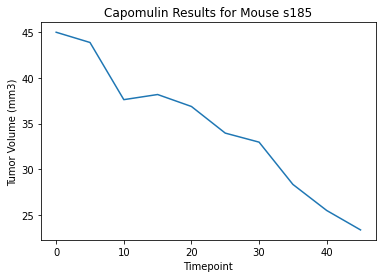

This line graph shows tumor volume vs timepoint for mouse s185 treated with Capomulin. As we can see, there is a decrease in tumor volume as the timepoint increases.


In [216]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#change index to mouse ID 
#remove other mouse IDs so only s185 shows
#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
mouseData = cleanStudy.loc[cleanStudy["Mouse ID"]== "s185"]
plt.plot(mouseData["Timepoint"], mouseData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Results for Mouse s185")
plt.show()
print(f"This line graph shows tumor volume vs timepoint for mouse s185 treated with Capomulin. As we can see, there is a decrease in tumor volume as the timepoint increases.")

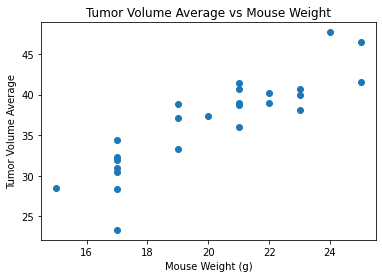

There seems to be a positive correlation between mouse weight and average tumor volume


In [215]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume
capomulinAvg = capomulinTable.groupby("Mouse ID").mean()



# establish x-axis value for the weight of the mice
plt.scatter(capomulinAvg["Weight (g)"], capomulinAvg["Tumor Volume (mm3)"])

# produce scatter plot of the data
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")
plt.show()
print(f"There seems to be a positive correlation between mouse weight and average tumor volume")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.88


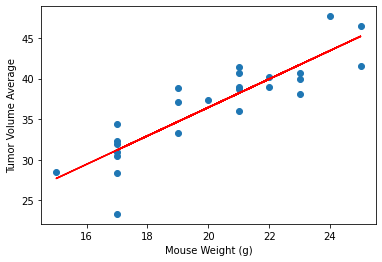

In [214]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
correlation = round(st.pearsonr(capomulinAvg["Weight (g)"], capomulinAvg["Tumor Volume (mm3)"])[0], 2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")


# establish linear regression values
model = st.linregress(capomulinAvg["Weight (g)"], capomulinAvg["Tumor Volume (mm3)"])
yValues = capomulinAvg["Weight (g)"] * model[0] + model[1]

# linear regression line 
plt.plot(capomulinAvg["Weight (g)"], yValues, color="red")

# scatter plot of the data
plt.scatter(capomulinAvg["Weight (g)"], capomulinAvg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.show()